In [1]:
from torchvision.transforms import ToTensor

from convolutional_model1 import ConvolutionalModel1
from convolutional_model2 import ConvolutionalModel2
from emotionDetectionDataset import EmotionDetectionDataset
from torch_train import *
from torchvision import transforms

import math

In [2]:
from matplotlib import pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.tight_layout()


def print_precisions_recalls_and_fscores(precision_and_recall, classes):
    header = "{:<25}".format("Class") + "".join("{:<25}".format(key) for key in ['precision', 'recall', 'f1-score'])
    print(header)
    print("-" * len(header))

    for i, cls in enumerate(classes.keys()):
        f1 = 2 * precision_and_recall[i, 0] * precision_and_recall[i, 1] / (
                    precision_and_recall[i, 0] + precision_and_recall[i, 1])
        row_str = "{:<25}".format(classes[cls]) + "".join(
            "{:<25}".format(str(value if not math.isnan(value) else 0.)) for value in
            precision_and_recall[i]) + "{:<25}".format(str(f1 if not math.isnan(f1) else 0.))
        print(row_str)

# PRVI MODEL

In [3]:
ROOT_PATH = 'dataset'
config = {'max_epochs': 5, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.001}

TRAIN_VAL_SPLIT = 0.75

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda')

### SVE KLASE

In [5]:
MODEL_SAVE_PATH = './models/model.pth'

In [5]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [7]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

In [9]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

C:\Users\tinaa\PycharmProjects\pythonProject\torch_train.py:124: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.49135802469135803      0.4154488517745303       0.4502262443438914       
disgusted                0.0                      0.0                      0.0                      
fearful                  0.3444592790387183       0.251953125              0.2910321489001692       
happy                    0.7988888888888889       0.8105975197294251       0.8047006155567992       
neutral                  0.5106696100073583       0.5628548256285483       0.5354938271604939       
sad                      0.40945861854387056      0.5276663993584603       0.4611072179397337       
surprised                0.6951934349355217       0.7135980746089049       0.7042755344418051       


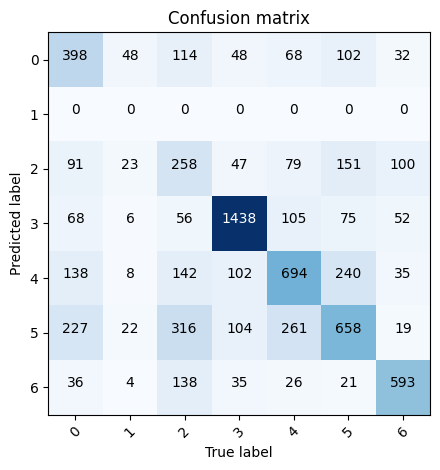

In [10]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

### BEZ DISGUSTED

In [11]:
MODEL_SAVE_PATH = './models/model_bez_disgusted.pth'

In [12]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

excluded_classes = [1]
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform, excluded_classes=excluded_classes), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor(), excluded_classes=excluded_classes)

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [13]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [14]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.018210452049970627, train accuracy=0.5616599858523933
Epoch 0, validation loss=0.017580879852175713, validation accuracy=0.5697509903791738
Epoch 1, train loss=0.01807846873998642, train accuracy=0.5619900966753124
Epoch 1, validation loss=0.017433036118745804, validation accuracy=0.5793718166383701
Epoch 2, train loss=0.018004462122917175, train accuracy=0.564065078990804
Epoch 2, validation loss=0.018760982900857925, validation accuracy=0.5332484436898698
Epoch 3, train loss=0.017915580421686172, train accuracy=0.5698655977363829
Epoch 3, validation loss=0.01743057183921337, validation accuracy=0.5759762308998302
Epoch 4, train loss=0.017872340977191925, train accuracy=0.5674605045979721
Epoch 4, validation loss=0.017565319314599037, validation accuracy=0.572014714204867


In [15]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.5417236662106704       0.4133611691022965       0.4689165186500888       
fearful                  0.4091858037578288       0.19140625               0.2608117099135063       
happy                    0.6936442615454961       0.855129650507328        0.7659681898510476       
neutral                  0.45654450261780105      0.7072181670721817       0.5548838689150493       
sad                      0.4876543209876543       0.31676022453889335      0.3840544482255713       
surprised                0.6631578947368421       0.7581227436823105       0.7074677147669849       


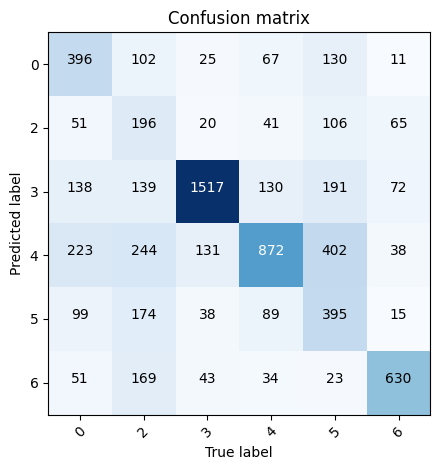

In [16]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

# DRUGI MODEL

In [8]:
ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model2_60epochs.pth'
config = {'max_epochs': 60, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.0001}

TRAIN_VAL_SPLIT = 0.8

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=transforms.ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

model = ConvolutionalModel2().to(device)

In [9]:
model.load_state_dict(torch.load('models/model2_60epochs.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True,
                            model_save_path=MODEL_SAVE_PATH)

In [10]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.4945155393053016       0.5647181628392485       0.5272904483430799       
disgusted                0.72                     0.4864864864864865       0.5806451612903226       
fearful                  0.4799154334038055       0.443359375              0.46091370558375633      
happy                    0.8224985867721877       0.8201803833145435       0.821337849280271        
neutral                  0.5927927927927928       0.5336577453365775       0.5616730687153223       
sad                      0.4918032786885246       0.529270248596632        0.5098493626882966       
surprised                0.7624703087885986       0.7725631768953068       0.7674835624626419       


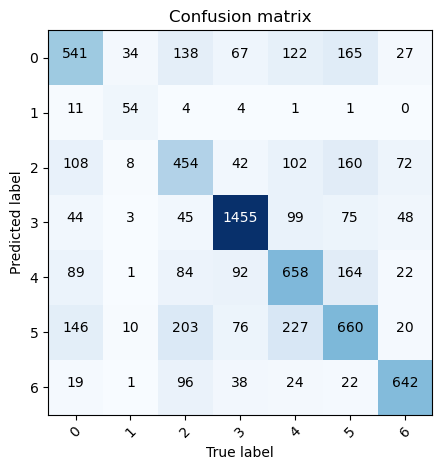

In [11]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

### BEZ DISGUSTED

In [20]:
MODEL_SAVE_PATH = './models/model_bez_disgusted2_60epochs.pth'

In [21]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

excluded_classes = [1]
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform, excluded_classes=excluded_classes), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor(), excluded_classes=excluded_classes)

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel2().to(device)

In [22]:
model.load_state_dict(torch.load('./models/model_bez_disgusted2_60epochs.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

In [23]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)